In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
train = pd.read_csv('churn_data.csv')

In [68]:
train.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Missing data

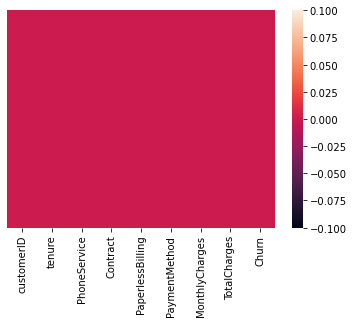

In [69]:
sns.heatmap(train.isnull(), yticklabels=False)

In [70]:
train.isnull().sum()

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Converting data to numerical

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 302.7+ KB


In [72]:
train.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
train['customerID'] = pd.factorize(train.customerID)[0]
train['Churn']=pd.factorize(train.Churn)[0]
train['PhoneService']=pd.factorize(train.PhoneService)[0]
train['Contract']=pd.factorize(train.Contract)[0]
train['PaperlessBilling']=pd.factorize(train.PaperlessBilling)[0]
train['PaymentMethod']=pd.factorize(train.PaymentMethod)[0]
train['TotalCharges']=pd.to_numeric(train['TotalCharges'],errors='coerce')
train.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,0,0,29.85,29.85,0
1,1,34,1,1,1,1,56.95,1889.50,0
2,2,2,1,0,0,1,53.85,108.15,1
3,3,45,0,1,1,2,42.30,1840.75,0
4,4,2,1,0,0,0,70.70,151.65,1


In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   int32  
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   int32  
 3   Contract          7043 non-null   int32  
 4   PaperlessBilling  7043 non-null   int32  
 5   PaymentMethod     7043 non-null   int32  
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   Churn             7043 non-null   int32  
dtypes: float64(2), int32(6), int64(1)
memory usage: 330.2 KB


## Data cleaning

In [75]:
train.isnull().sum()

customerID           0
tenure               0
PhoneService         0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [76]:
print(np.any(np.isnan(train)))
print(np.all(np.isfinite(train)))

True
False


In [77]:
train['TotalCharges'].fillna(train['TotalCharges'].mean(), inplace=True)

## Train and test data split

In [78]:
from sklearn.model_selection import train_test_split

x=train.drop('Churn', axis=1)
y=train['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30, random_state=0)

# logistic regression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score

model_1 = LogisticRegression()
model_1.fit(x_train,y_train)

d:\python 3.8\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
predictions = model_1.predict(x_test)
predictions

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [81]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1560
           1       0.64      0.52      0.57       553

    accuracy                           0.80      2113
   macro avg       0.74      0.71      0.72      2113
weighted avg       0.79      0.80      0.79      2113

[[1398  162]
 [ 265  288]]
0.7979176526265973


# Support vector machine

In [82]:
from sklearn.svm import SVC
model_2 = SVC()
model_2.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
predictions2 = model_2.predict(x_test)

In [84]:
print(classification_report(y_test, predictions2))
print(confusion_matrix(y_test, predictions2))
print(accuracy_score(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      1560
           1       0.00      0.00      0.00       553

    accuracy                           0.74      2113
   macro avg       0.37      0.50      0.42      2113
weighted avg       0.55      0.74      0.63      2113

[[1560    0]
 [ 553    0]]
0.7382867960246096


d:\python 3.8\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive bayes 

In [85]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

model_3 = GaussianNB()
model_3.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [86]:
predictions3 = model_3.predict(x_test)

In [87]:
print(classification_report(y_test, predictions3))
print(confusion_matrix(y_test, predictions3))
print(accuracy_score(y_test, predictions3))

              precision    recall  f1-score   support

           0       0.88      0.73      0.80      1560
           1       0.49      0.71      0.58       553

    accuracy                           0.73      2113
   macro avg       0.68      0.72      0.69      2113
weighted avg       0.77      0.73      0.74      2113

[[1143  417]
 [ 160  393]]
0.7269285376242309


# Decition trees

In [88]:
from sklearn.tree import DecisionTreeClassifier

model_4 = DecisionTreeClassifier()
model_4.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [89]:
predictions4 = model_4.predict(x_test)

In [90]:
print(classification_report(y_test, predictions4))
print(confusion_matrix(y_test, predictions4))
print(accuracy_score(y_test, predictions4))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1560
           1       0.50      0.52      0.51       553

    accuracy                           0.74      2113
   macro avg       0.66      0.67      0.67      2113
weighted avg       0.74      0.74      0.74      2113

[[1272  288]
 [ 265  288]]
0.7382867960246096


# K-means clustering

In [91]:
from sklearn.cluster import KMeans

model_5 = KMeans(n_clusters=2)
model_5.fit(train.drop('Churn',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [92]:
model_5.cluster_centers_

array([[3.50757636e+03, 2.11414141e+01, 8.81414141e-01, 4.87070707e-01,
        4.53535354e-01, 1.18040404e+00, 5.35851616e+01, 9.82391324e+02],
       [3.55274725e+03, 5.89297659e+01, 9.54610607e-01, 1.17152413e+00,
        2.99569995e-01, 1.63545151e+00, 9.11944816e+01, 5.35998469e+03]])

In [93]:
model_5.labels_

array([0, 0, 0, ..., 0, 0, 1])

In [94]:
def converter(cluster):
    if cluster=='Yes':
        return 1
    else:
        return 0
    
predictions5 = train['Churn'].apply(converter)

In [95]:
print(classification_report(predictions5, model_5.labels_))
print(confusion_matrix(predictions5, model_5.labels_))
print(accuracy_score(predictions5, model_5.labels_))

              precision    recall  f1-score   support

           0       1.00      0.70      0.83      7043
           1       0.00      0.00      0.00         0

    accuracy                           0.70      7043
   macro avg       0.50      0.35      0.41      7043
weighted avg       1.00      0.70      0.83      7043

[[4950 2093]
 [   0    0]]
0.7028255004969474


d:\python 3.8\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random forests

In [96]:
from sklearn.ensemble import RandomForestClassifier

model_6 = RandomForestClassifier(n_estimators=100)
model_6.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [97]:
predictions6 = model_6.predict(x_test)

In [98]:
print(classification_report(y_test, predictions6))
print(confusion_matrix(y_test, predictions6))
print(accuracy_score(y_test, predictions6))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1560
           1       0.62      0.47      0.53       553

    accuracy                           0.79      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.77      0.79      0.78      2113

[[1398  162]
 [ 292  261]]
0.7851396119261713
